In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 5  # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # carma_variance computes the autcovariance function

Text(0,0.5,'magnitud')

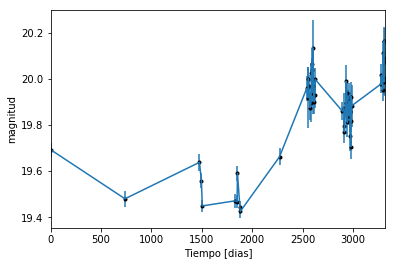

In [2]:
data = np.genfromtxt('LC_U_141827.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

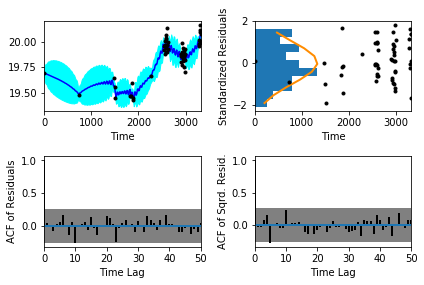

In [5]:
sample.assess_fit()

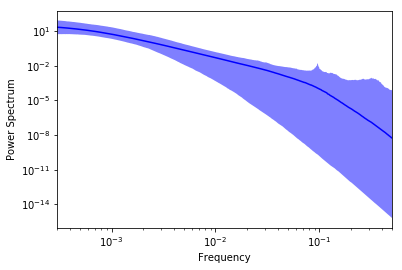

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.302231,'Nivel de ruido')

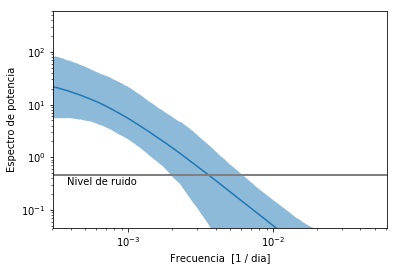

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

In [9]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [10]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [11]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 337.069834153
Median: 0.0945966178217
Standard deviation: 0.273294158027
68% credibility interval: [ 0.          0.53274969]
95% credibility interval: [ 0.          0.90633647]
99% credibility interval: [ 0.          0.98433785]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 337.069834153
Median: 0.0945966178217
Standard deviation: 0.273294158027
68% credibility interval: [ 0.          0.53274969]
95% credibility interval: [ 0.          0.90633647]
99% credibility interval: [ 0.          0.98433785]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 812.639849104
Median: 0.0
Standard deviation: 0.000282597252558
68% cr

Plotting parameter summary


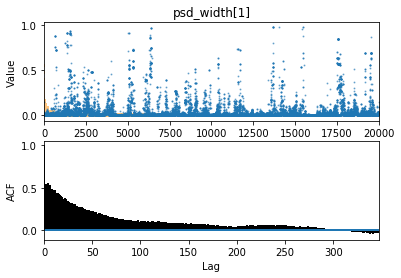

In [13]:
sample.plot_parameter('psd_width', 1, doShow=True)

In [14]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 501.822732182
Median: 79.2601759187
Standard deviation: 2.07395648677
68% credibility interval: [ 76.93600993  81.04514658]
95% credibility interval: [ 74.4555507   82.22993651]
99% credibility interval: [ 72.43122414  83.42835786]


In [16]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 561.089115737
Median: 1.51447742645
Standard deviation: 2.47429346393
68% credibility interval: [ 0.20156482  5.02549535]
95% credibility interval: [ 0.03177867  8.63186901]
99% credibility interval: [  0.01450261  11.96841332]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 635.874043899
Median: 1.88767000108
Standard deviation: 10.9972765847
68% credibility interval: [  0.13518218  16.3213865 ]
95% credibility interval: [  4.90899599e

In [18]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 6731.48269591
Median: 3.21006656884e-32
Standard deviation: 1.49017328043e+147
68% credibility interval: [  2.36964611e-67   3.53055464e-05]
95% credibility interval: [  1.74779894e-110   5.69324004e+031]
99% credibility interval: [  8.69315019e-120   1.05725060e+098]


In [20]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1655.84466915
Median: 19.7083057625
Standard deviation: 0.106202154951
68% credibility interval: [ 19.60744552  19.80298794]
95% credibility interval: [ 19.50891475  19.91301025]
99% credibility interval: [ 19.41513571  20.03801132]


In [22]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [23]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 337.069834153
Median: 0.0945966178217
Standard deviation: 0.273294158027
68% credibility interval: [ 0.          0.53274969]
95% credibility interval: [ 0.          0.90633647]
99% credibility interval: [ 0.          0.98433785]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 337.069834153
Median: 0.0945966178217
Standard deviation: 0.273294158027
68% credibility interval: [ 0.          0.53274969]
95% credibility interval: [ 0.          0.90633647]
99% credibility interval: [ 0.          0.98433785]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 812.639849104
Median: 0.0
Standard deviation: 0.000282597252558
68% cr

In [24]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [25]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 501.822732182
Median: 79.2601759187
Standard deviation: 2.07395648677
68% credibility interval: [ 76.93600993  81.04514658]
95% credibility interval: [ 74.4555507   82.22993651]
99% credibility interval: [ 72.43122414  83.42835786]


In [26]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [27]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 356.121298678
Median: 0.0169145625719
Standard deviation: 0.191824903896
68% credibility interval: [ 0.00159749  0.20375105]
95% credibility interval: [  4.02319055e-04   7.21589568e-01]
99% credibility interval: [  3.31919687e-04   9.56229714e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 287.806492339
Median: 0.00575345742084
Standard deviation: 0.110066061828
68% credibility interval: [ 0.00062434  0.05810946]
95% credibility interval: [  3.31939526e-04   4.01960828e-01]
99% credibility interval: [  3.11003674e-04   7.21290371e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1144.34561462
Median: 0.104350718003
S

In [28]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [29]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1647.99391342
Median: 0.0464885450466
Standard deviation: 0.0452665025505
68% credibility interval: [ 0.02987673  0.07761876]
95% credibility interval: [ 0.02016287  0.15049649]
99% credibility interval: [ 0.01565683  0.26707476]


In [30]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [31]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1179.55946025
Median: 1.11829076769
Standard deviation: 0.207782674051
68% credibility interval: [ 0.92994167  1.34315371]
95% credibility interval: [ 0.77605648  1.58936314]
99% credibility interval: [ 0.69970424  1.7440054 ]


In [32]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [33]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 655.447013928
Median: 0.00623779139862
Standard deviation: 0.369559176818
68% credibility interval: [  7.76949296e-05   1.96946689e-01]
95% credibility interval: [  1.73887192e-36   1.15681647e+00]
99% credibility interval: [  1.28661930e-101   2.52714031e+000]


In [34]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [35]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 356.121298678
Median: (-0.106277331029-0.724404893862j)
Standard deviation: 2.09792998735
68% credibility interval: [-1.28020562-0.97548445j -0.01003735-0.36093664j]
95% credibility interval: [ -4.53388097e+00+0.j          -2.52784518e-03-0.21214332j]
99% credibility interval: [ -6.00816849e+00+0.j          -2.08551290e-03-6.24111744j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 287.806492339
Median: (-0.0361500391321+0.290828967531j)
Standard deviation: 1.85118714083
68% credibility interval: [-0.36511252+0.06329487j -0.00392286+0.00188605j]
95% credibility interval: [ -2.52559437e+00+2.17204905j  -2.08563756e-03+0.j        ]
99% credibility interval: [ -4.53200106e+00+4.8376769j  -1.95409371e-03+0.j       ]
Poste

Plotting 2d PDF w KDE


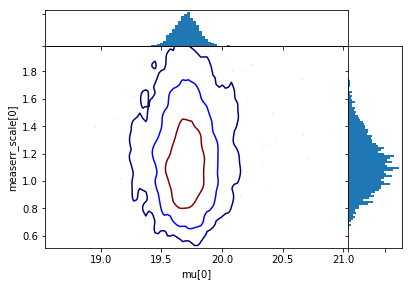

In [36]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


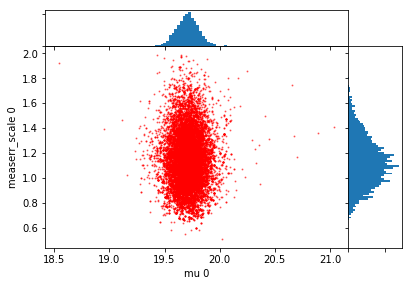

In [37]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


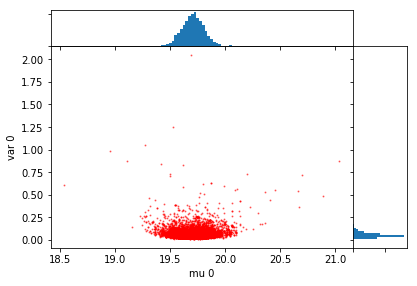

In [38]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


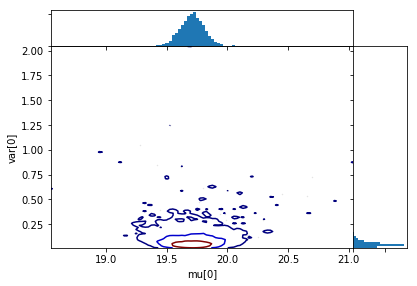

In [39]:
sample.plot_2dkde('mu', 'var', doShow=True)

Text(0.5,1,'Interpolacion, camino simulado')

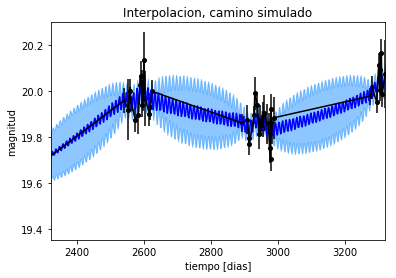

In [40]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

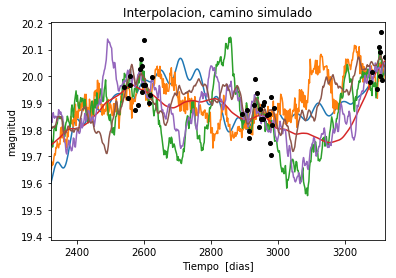

In [41]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')